## EDA
Load the data.
Look at the median_house_value variable. Does it have a long tail?

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
#load the data
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


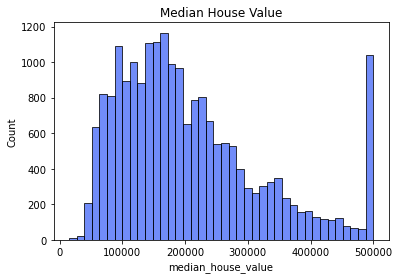

In [3]:
#look at median_house_value
sns.histplot(df.median_house_value, alpha = 0.6, bins = 40, color='#123ff5')
plt.title('Median House Value');

## Features
For the rest of the homework, you'll need to use only these columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'
Select only them.

In [4]:
cols = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
df = df[cols]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## Question 1
Find a feature with missing values. How many missing values does it have?

**207**/208/307/308

In [5]:
df.isnull().sum()
# total_bedrooms => 207

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Question 2
What's the median (50% percentile) for variable 'population'?

1133
1122
**1166**
1188

In [6]:
df.population.describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

## Split the data
- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value ('median_house_value') is not in your dataframe.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [7]:
#set seeds and ns
np.random.seed(42)
n = len(df)
n_val = int(0.2*n)
n_test = n_val
n_train = n - 2* n_val
len(df) == n_train + n_test + n_val

True

In [8]:
#shuffle dataframe
shuffled_df = df.sample(frac =1)
shuffled_df.reset_index(drop=True, inplace=True)
shuffled_df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
3,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
4,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
20635,33.78,-117.96,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0
20636,34.02,-117.43,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0
20637,34.03,-118.38,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0
20638,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0


In [9]:
#split data
df_val = shuffled_df.iloc[:n_val].copy()
df_test = shuffled_df.iloc[n_val:n_val+n_test].copy()
df_train = shuffled_df.iloc[n_val+n_test:].copy()
print(len(df_val), len(df_test), len(df_train))
print(f'record count is:{len(df_val) + len(df_test) + len(df_train)}')

4128 4128 12384
record count is:20640


In [10]:
#extracting targets & applying log transformation to deal with skewness
y_train = np.log1p(df_train['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)

In [12]:
# removing the target from the dataframes
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [13]:
df_train.head()
# median house value poofed!

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
8256,34.11,-118.63,35.0,3795.0,690.0,1521.0,653.0,5.8735
8257,33.32,-115.98,8.0,240.0,46.0,63.0,24.0,1.4688
8258,38.74,-120.78,28.0,4236.0,877.0,2008.0,881.0,2.1603
8259,37.58,-122.37,43.0,2506.0,432.0,967.0,428.0,4.7404
8260,37.45,-121.92,10.0,3937.0,1054.0,2032.0,1002.0,3.2617


In [14]:
df_train.dtypes == df_val.dtypes

latitude              True
longitude             True
housing_median_age    True
total_rooms           True
total_bedrooms        True
population            True
households            True
median_income         True
dtype: bool

## Question 3
We need to deal with missing values for the column from Q1.<br>
We have two options: fill it with 0 or with the mean of this variable.<br>
Try both options. For each, train a linear regression model without regularization using the code from the lessons.<br>
For computing the mean, use the training only!<br>
Use the validation dataset to evaluate the models and compare the RMSE of each option.<br>
Round the RMSE scores to 2 decimal digits using round(score, 2)<br>
Which option gives better RMSE?<br>
Options:<br>

With 0<br>
With mean<br>
With median<br>
Both are equally good<br>

In [15]:
#Prep and train code
def impute_mean(df):
    df = df.copy()
    df = df.fillna(df.total_bedrooms.mean())
    X = df.values
    return X

def impute_zero(df):
    df = df.copy()
    df = df.fillna(0)
    X = df.values
    return X

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [16]:
#filling with mean
X_train = impute_mean(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', round(rmse(y_train, y_pred),2))
X_val = impute_mean(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', round(rmse(y_val, y_pred),2))

train 0.34
validation 0.35


In [17]:
X_train = impute_zero(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', round(rmse(y_train, y_pred),2))
X_val = impute_zero(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', round(rmse(y_val, y_pred),2))

train 0.34
validation 0.36


#### As validation for both mean and zero imputation is the same, the answer is both are equally good.

## Question 4
Now let's train a regularized linear regression.<br>
For this question, fill the NAs with 0.<br>
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].<br>
Use RMSE to evaluate the model on the validation dataset.<br>
Round the RMSE scores to 2 decimal digits.<br>
Which r gives the best RMSE?<br>
If there are multiple options, select the smallest r.<br>

Options:<br>

0<br>
0.000001<br>
0.001<br>
0.01<br>

In [18]:
# function
def regularized_lr(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [19]:
X_train = impute_zero(df_train)

def validator():
    res = [1000000, 0] 
    for r in [0, 0.001, 0.01, 0.000001]:
        w_0, w = regularized_lr(X_train, y_train, r=r)
        X_val = impute_zero(df_val)
        y_pred = w_0 + X_val.dot(w)
        metric = rmse(y_val, y_pred)
        print(f'at alpha = {r}, validation RMSE = {round(metric,2)}')
        if metric < res[0]:
            res[0] = metric
            res[1] = r
    print(f'best validation score = {round(res[0],2)} at alpha = {res[1]}')

In [20]:
X_train = impute_zero(df_train)

def validator_no_rounding():
    res = [1000000, 0] 
    for r in [0, 0.001, 0.01, 0.000001]:
        w_0, w = regularized_lr(X_train, y_train, r=r)
        X_val = impute_zero(df_val)
        y_pred = w_0 + X_val.dot(w)
        metric = rmse(y_val, y_pred)
        print(f'at alpha = {r}, validation RMSE = {metric}')
        if metric < res[0]:
            res[0] = metric
            res[1] = r
    print(f'best validation score = {res[0]} at alpha = {res[1]}')

In [21]:
validator()

at alpha = 0, validation RMSE = 0.36
at alpha = 0.001, validation RMSE = 0.36
at alpha = 0.01, validation RMSE = 0.36
at alpha = 1e-06, validation RMSE = 0.36
best validation score = 0.36 at alpha = 0.01


In [22]:
validator_no_rounding()

at alpha = 0, validation RMSE = 0.3555406178184542
at alpha = 0.001, validation RMSE = 0.35553528430183123
at alpha = 0.01, validation RMSE = 0.3554898149801396
at alpha = 1e-06, validation RMSE = 0.355540612458946
best validation score = 0.3554898149801396 at alpha = 0.01


#### Best value at alpha = 0.01 based on results from validator_no_rounding

## Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score. <br>
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].<br>
For each seed, do the train/validation/test split with 60%/20%/20% distribution.<br>
Fill the missing values with 0 and train a model without regularization.<br>
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.<br>
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.<br>
Round the result to 3 decimal digits (round(std, 3))<br>
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.<br>

Options:<br>

0.5<br>
0.05<br>
0.005<br>
0.0005<br>

In [23]:
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
score_list = []
for i in seed_list:
    np.random.seed(i)
    shuffled_df = df.sample(frac =1)
    shuffled_df.reset_index(drop=True, inplace=True)
    df_val = shuffled_df.iloc[:n_val].copy()
    df_test = shuffled_df.iloc[n_val:n_val+n_test].copy()
    df_train = shuffled_df.iloc[n_val+n_test:].copy()
    y_train = np.log1p(df_train['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    X_train = impute_zero(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    X_val = impute_zero(df_val)
    y_pred = w_0 + X_val.dot(w)
    print(f'validation score for seed value of {i} = {round(rmse(y_val, y_pred),2)}')
    score_list.append(round(rmse(y_val, y_pred),2))

validation score for seed value of 0 = 0.34
validation score for seed value of 1 = 0.35
validation score for seed value of 2 = 0.35
validation score for seed value of 3 = 0.34
validation score for seed value of 4 = 0.34
validation score for seed value of 5 = 0.34
validation score for seed value of 6 = 0.34
validation score for seed value of 7 = 0.34
validation score for seed value of 8 = 0.34
validation score for seed value of 9 = 0.34


In [24]:
std_of_results = round(np.std(score_list),3)
std_of_results

0.004

## Question 6
Split the dataset like previously, use seed 9. <br>
Combine train and validation datasets.<br>
Fill the missing values with 0 and train a model with r=0.001.<br>
What's the RMSE on the test dataset?<br>
Options:<br>

0.35<br>
0.035<br>
0.45<br>
0.045<br>

In [25]:
## since i am re-using code, I took the liberty to forgo the pd.concat[df_train, df_val]
np.random.seed(9)
shuffled_df = df.sample(frac =1)
shuffled_df.reset_index(drop=True, inplace=True)
df_test = shuffled_df.iloc[:n_test].copy()
df_train = shuffled_df.iloc[n_test:].copy()
y_train = np.log1p(df_train['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)
del df_train['median_house_value']
del df_test['median_house_value']

In [26]:
X_train = impute_zero(df_train)
w_0, w = regularized_lr(X_train, y_train, r=0.001)

In [27]:
X_test = impute_zero(df_test)
y_pred = w_0 + X_test.dot(w)
print(rmse(y_test, y_pred))
print(f'validation score for test dataset = {round(rmse(y_test, y_pred),2)}')

0.33754717797127454
validation score for test dataset = 0.34
